# Main Charts in Data Analysis

## Data Exploratory

In [ ]:
# download dataset
!wget https://raw.githubusercontent.com/Njmondoa/Superstore-Sales-Analysis/main/SuperStore_data.csv

In [91]:
# load and read the dataset
import pandas as pd
df = pd.read_csv('SuperStore_data.csv')

In [4]:
df.shape

(10296, 21)

In [ ]:
df.head()

In [ ]:
df.info()

## Pie Chart

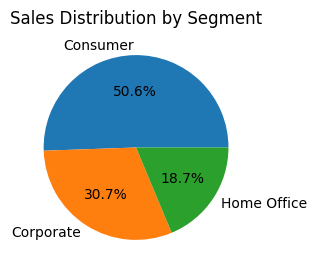

In [61]:
# Calculate total sales for each segment
sales_by_segment = df.groupby('Segment')['Sales'].sum()

# Create pie chart
plt.figure(figsize=(3, 3), dpi=100)
plt.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Segment')
plt.show()

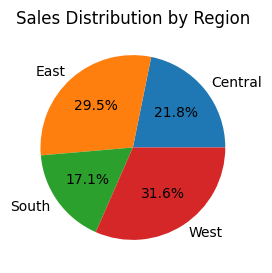

In [62]:
# Calculate total sales for each region
sales_by_region = df.groupby('Region')['Sales'].sum()

# Create pie chart
plt.figure(figsize=(3, 3), dpi=100)
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()

## Bar Chart | Clustered Bar Chart | Stacked Bar Chart

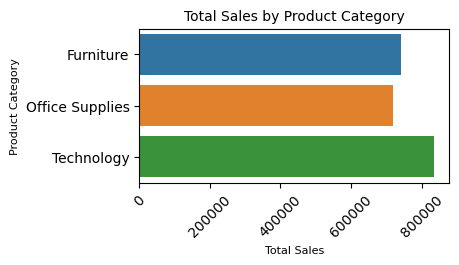

In [30]:
from numpy import size
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales for each category
sales_by_category = df.groupby('Category')['Sales'].sum()

# Create horizontal bar chart
plt.figure(figsize=(4, 2), dpi=100)
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, orient='h')
plt.xticks(rotation=45)
plt.xlabel('Total Sales', size=8)
plt.ylabel('Product Category', size=8)
plt.title('Total Sales by Product Category', size=10)
plt.show()

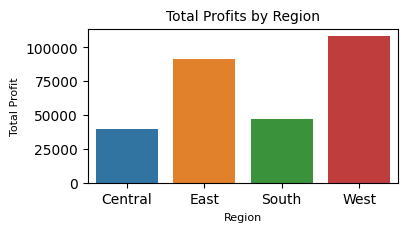

In [31]:
# Calculate total profits for each region
profits_by_region = df.groupby('Region')['Profit'].sum()

# Create vertical bar chart
plt.figure(figsize=(4, 2), dpi=100)
sns.barplot(x=profits_by_region.index, y=profits_by_region.values, orient='v')
plt.xlabel('Region', size=8)
plt.ylabel('Total Profit', size=8)
plt.title('Total Profits by Region', size=10)
plt.show()

In [48]:
# Calculate total sales and profits for each category
sales_and_profits_by_category = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
# Melt the data
melted_data = pd.melt(sales_and_profits_by_category, id_vars="Category", var_name="Type", value_name="Total")

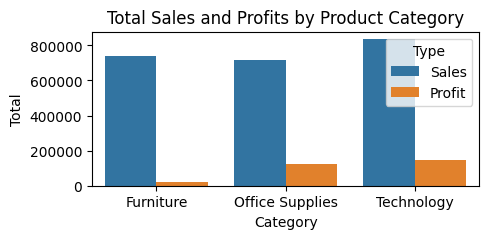

In [52]:
plt.figure(figsize=(5, 2), dpi=100)
sns.barplot(x='Category', y='Total', hue='Type', data=melted_data)
plt.title('Total Sales and Profits by Product Category')
plt.show()

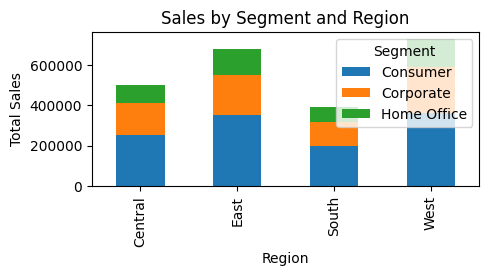

In [53]:
# Calculate total sales for each segment in each region
sales_by_region_segment = df.groupby(['Region', 'Segment'])['Sales'].sum().unstack()
sales_by_region_segment.plot(kind='bar', stacked=True, figsize=(5, 2))
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Segment and Region')
plt.show()

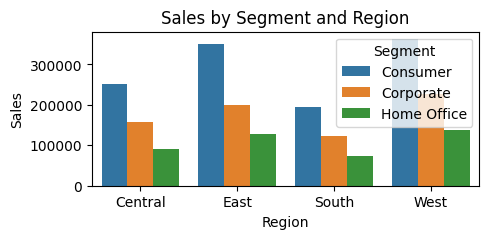

In [55]:
# Calculate total sales for each segment in each region
sales_by_region_segment = df.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()

plt.figure(figsize=(5, 2), dpi=100)
sns.barplot(x='Region', y='Sales', hue='Segment', data=sales_by_region_segment)
plt.title('Sales by Segment and Region')
plt.show()

## Histogram

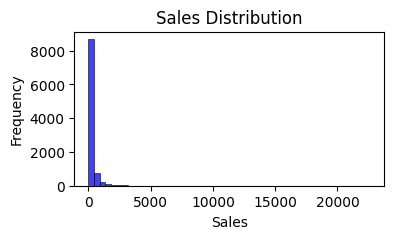

In [78]:
plt.figure(figsize=(4, 2), dpi=100)
sns.histplot(df['Sales'], bins=50, kde=False, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

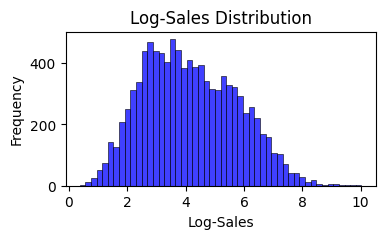

In [79]:
import numpy as np
plt.figure(figsize=(4, 2), dpi=100)
sns.histplot(np.log1p(df['Sales']), bins=50, kde=False, color='blue')
plt.title('Log-Sales Distribution')
plt.xlabel('Log-Sales')
plt.ylabel('Frequency')
plt.show()

## Line Chart

<ipython-input-92-799e42822535>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = df.resample('M').sum()


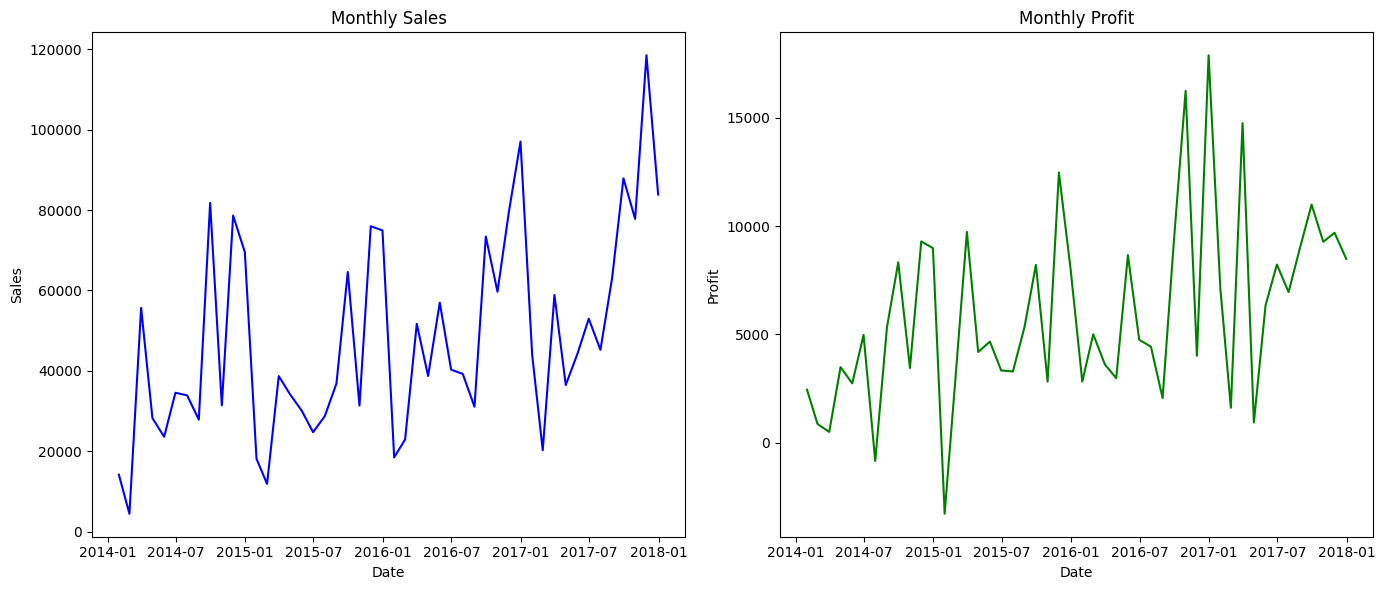

In [92]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

# Resample by month and sum sales and profit
monthly_data = df.resample('M').sum()

# Create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot sales
ax[0].plot(monthly_data.index, monthly_data['Sales'], color='blue')
ax[0].set_title('Monthly Sales')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Sales')

# Plot profit
ax[1].plot(monthly_data.index, monthly_data['Profit'], color='green')
ax[1].set_title('Monthly Profit')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Profit')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-87-63ea9afbde34>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = df.resample('Y').sum()


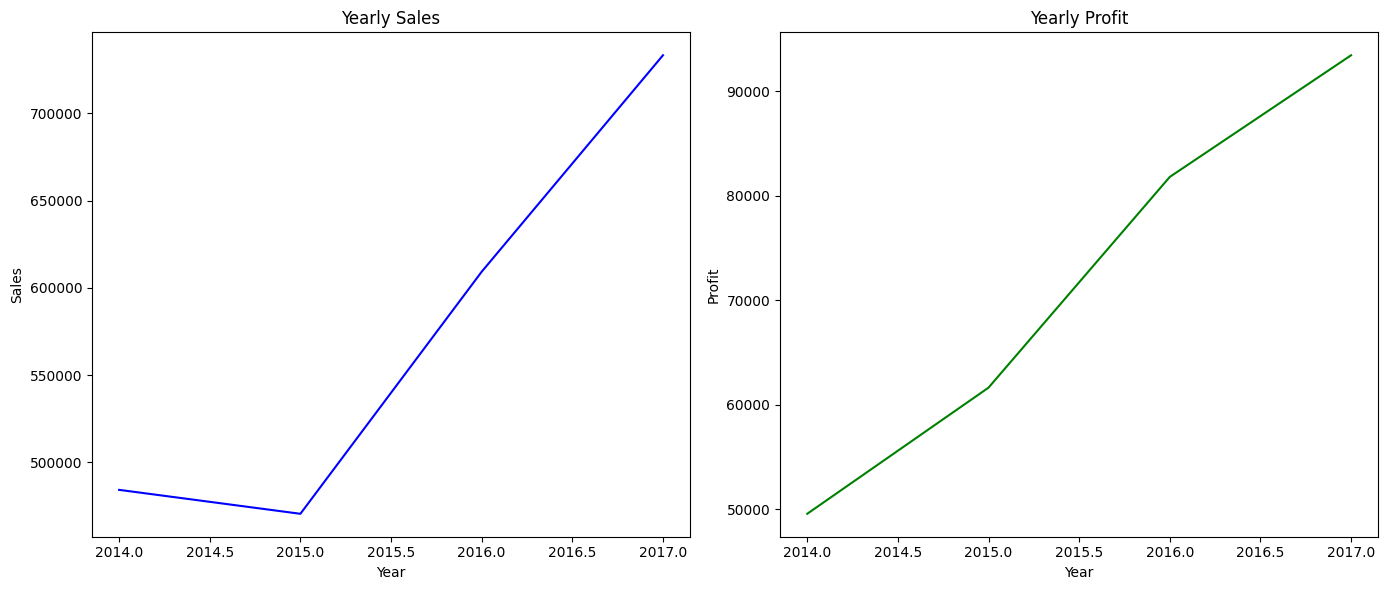

In [87]:
# Resample by year and sum sales and profit
yearly_data = df.resample('Y').sum()

# Create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot sales
ax[0].plot(yearly_data.index.year, yearly_data['Sales'], color='blue')
ax[0].set_title('Yearly Sales')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Sales')

# Plot profit
ax[1].plot(yearly_data.index.year, yearly_data['Profit'], color='green')
ax[1].set_title('Yearly Profit')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Profit')

# Show the plot
plt.tight_layout()
plt.show()

## Scatter Plot

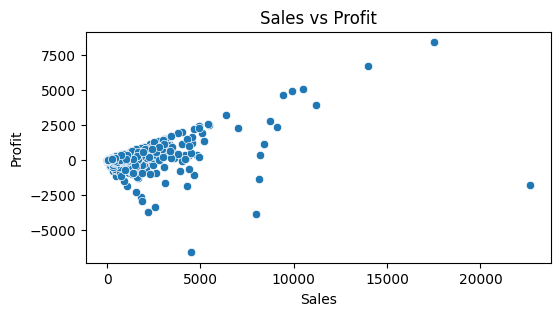

In [115]:
plt.figure(figsize=(6, 3), dpi=100)
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

## BoxPlot

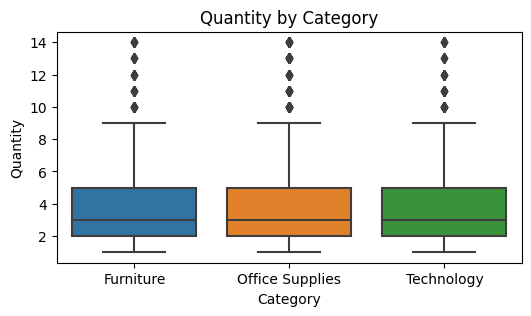

In [118]:
plt.figure(figsize=(6, 3), dpi=100)
sns.boxplot(x='Category', y='Quantity', data=df)
plt.title('Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()
